<a href="https://colab.research.google.com/github/Mike-AG2021/Analisis-Inteligente-de-Datos/blob/main/Pyhton%20documentos/Caso_5_Predicciones_de_da%C3%B1os_Coraz%C3%B3n_con_Algoritmos_Supervisados_basados_en_tareas_de_Clasificaci%C3%B3n_Regresi%C3%B3n_Log%C3%ADstica_Binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: "Jesús Miguel Acosta Gurrola"
# Date: "25/05/2022"

# Objetivo
Implementar el modelo de regresión logística binaria con datos relacionados a una condición de salud de las personas para predecir anomalías de corazón y evaluar la exactitud del modelo mediante la matriz de confusión.

#Descripción
Se cargan librerías y se descargan los datos: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv

Los datos están relacionados con aspectos médicos y son valores numéricos de varias variables que caracterizan el estado de salud de 319,795 personas.

Se pretende construir un modelo utilizando algoritmos supervisados para resolver la tarea de clasificación binaria e identificar si una persona padece del corazón o no.

Se construyen datos de entrenamiento y validación al 80% y 20% cada uno.

Se desarrollan los modelos de:

- Regresión Logística binaria

- Árbol de Clasificación tipo class

- K Means

- SVM Lineal

- SVM Polinomial

- SVM Radial

Los modelo se aceptan si tienen un valor de exactitud por encima del 70%..

#Fundamento teórico
La regresión logística ofrece solución para clasificar y para predecir valores lógicos, es decir con un valor etiquetado tal vez 0 o 1.

Para predicciones el modelo de regresión logística binaria encuentra la probabilidad de ocurrencia de un evento determinado y dicha probabilidad se hallará siempre dentro del rango.

Cuando la variable respuesta posee dos categorías, entonces se estará delante de una regresión logística binaria. En cambio, si la variable respuesta posee más de dos categorías, se usará la regresión logística multinomial (Zang, Jindu 2020).

En este caso que se presenta y describe a continuación, se utiliza la regresión logística binomial como parte de los algoritmos supervisados de machine learning.

El modelo requiere una cantidad de variables independientes del modelo $x_1, x_2 ... x_n$ ó $\beta_1, \beta_2...\beta_n$
Se debe identificar la variable dependiente $Y$ o la variable respuesta de tipo binaria, donde cada componente de 𝑌 se distribuye mediante una distribución de Bernoulli [0|1].

Se necesitan n𝑛 el número de observaciones.
Entonces $𝑋 = (𝑥_1, … , 𝑥_𝑛)^T$ el conjunto de variable independientes.

Se identifica como $θ$ el vector de parámetros asociado al modelo, de forma que $\theta\in R^{k+1}$ que significa que los valores del vector resultante pertenecen a cada una de las variables.
Sea $\pi(\theta^T𝑥_𝑖)$ la probabilidad de que $Yi$ tome un valor igual a $1$, entonces su modelo se puede escribir como:
$$\pi(\theta^Tx_i) = P(Y =1|X=x) = \frac{1}{1+e}$$
Si $\theta^Tx_i$ los valores ajustados toma valores elevados y positivos, entonces … … se aproximará a 0 y, en consecuencia, el valor de la función anterior será igual a 1. En caso de que $\theta^Tx_i$ tome valores elevados pero negativos, entonces el valor de la función será $0$ dado que $e^ {\theta^Tx_i}$ tenderá a infinito. (Zang, Jindu 2020).
El valor ee como número irracional y basado en la teoría de logaritmos naturales es el valor constante que se puede obtener en lenguaje R con la función exp(1) igual a 2.7182818.

Efectuando la transformación logit a la expresión inicial, se obtiene:
$$logit(\pi(\theta^Tx_i)) = ln(\frac{\pi(\theta^Tx_i)}{1 -
\pi(\theta^Tx_i)})$$
que significa calcular el logaritmo natural de cada valor de de xi para determinar su probabilidad.


#Desarrollo

#Cargar librerías


In [252]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import keras.callbacks
from keras.models import load_model
import sklearn.ensemble
import shap
import numba
import time
import xgboost


#Cargar datos
Cargamos los datos.

In [253]:
datos = datos = pd.read_csv("https://raw.githubusercontent.com/Mike-AG2021/Analisis-Inteligente-de-Datos/main/Pyhton%20documentos/heart_2020_cleaned.csv")

#Explorar Datos

In [254]:
datos.head

<bound method NDFrame.head of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  Age

In [255]:
datos.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


#Limpiar Datos

Crear variable llamada HeartDisease01 que se utilizará en el modelo de Regresión Logística tendrá valores 0 de para no daño y 1 para daño.

In [256]:
datos.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [257]:
datos.dropna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#Las variables de interés
Todas las variables son de entrada o variables independientes:

“BMI”: Indice de masa corporal con valores entre 12.02 y 94.85.

“Smoking”: Si la persona es fumadora o no con valores categóritos de ‘Yes’ o ‘No.’

“AlcoholDrinking” : Si consume alcohol o no, con valores categóricos de ‘Yes’ o ‘No.’

“Stroke”: Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de ‘Yes’ o ‘No.’

“PhysicalHealth” Estado físico en lo general con valores entre 0 y 30.

“MentalHealth.” Estado mental en lo general con valores entre 0 y 30.

“DiffWalking” . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de ‘Yes’ o ‘No.’

“Sex”: Género de la persona, con valores de ‘Female’ y ‘Male’ para distinguir al género femenino y masculino respectivamente.

“AgeCategory”: Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años.

“Race.” Raza u origen de la persona con valores categóricos de ‘American Indian/Alaskan Native’, ’Asian’,’Black’, ’Hispanic’, ’Other’ y’White’.

“Diabetic.” Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: ‘No,’ ‘borderline diabetes’ condición antes de detectarse diabetes tipo 2, ‘Yes,’ y ‘Yes (during pregnancy)’ durante embarazo.

“PhysicalActivity” que si realiza actividad física, con valores categóricos de ‘Yes’ o ‘No.’

“GenHealth”: EStado general de salud de la persona con valores categóricos de ‘Excellent,’ ‘Very good,’ ‘Good,’ ‘Fair’ y ‘Poor’ con significado en español de excelente, muy buena, buena, regular y pobre o deficiente.

“SleepTime”: valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.

“Asthma”: si padece de asma o no, con valores categóricos de ‘Yes’ o ‘No.’

“KidneyDisease”: si tiene algún padecimiento en los riñones, con valores categóricos de ‘Yes’ o ‘No.’

“SkinCancer”: si padece algún tipo de cancer de piel, con valores categóricos de ‘Yes’ o ‘No.’

La variable de interés como dependiente o variable de salida es la de daño al corazón (HeartDisease), con valores categóricos de ‘Yes’ o ‘No.’

#Datos de entrenamiento y validación
Se parten los datos en en datos de entrenamiento con el 80% y datos de validación con el 20%.




In [258]:
datos.iloc[:, 4:5]

,Stroke
0,No
1,Yes
2,No
3,No
4,No
...,...
319790,No
319791,No
319792,No
319793,No


In [259]:
print("Variables independientes ")
X_independientes = datos.iloc[:,1:4]
X_independientes

Variables independientes 


,BMI,Smoking,AlcoholDrinking
0,16.60,Yes,No
1,20.34,No,No
2,26.58,Yes,No
3,24.21,No,No
4,23.71,No,No
...,...,...,...
319790,27.41,Yes,No
319791,29.84,Yes,No
319792,24.24,No,No
319793,32.81,No,No


In [260]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 4:5]
Y_dependiente

Variable dependiente


,Stroke
0,No
1,Yes
2,No
3,No
4,No
...,...
319790,No
319791,No
319792,No
319793,No


Datos entrenamiento y validación

In [261]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=4421)

#Datos de entrenamiento
Se muestran los primeros 20 registros datos de entrenamiento

In [262]:
print("Primeros 20 registros de datos de entrenamiento")
datos[['HeartDisease', 'PhysicalHealth']].head(n=20)

Primeros 20 registros de datos de entrenamiento


,HeartDisease,PhysicalHealth
0,No,3.0
1,No,0.0
2,No,20.0
3,No,0.0
4,No,28.0
5,Yes,6.0
6,No,15.0
7,No,5.0
8,No,0.0
9,No,0.0


#Regresión Logística binomial
Se construye el modelo con los datos de entrenamiento mediante la función glm() indicando que es regresión logística binomial es decir solo dos valores.

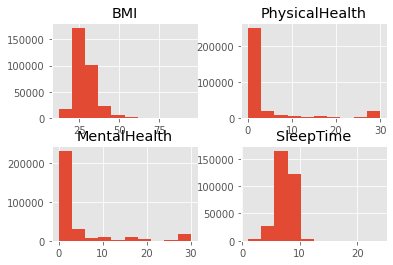

In [263]:
datos.drop(['HeartDisease'],1).hist()
plt.show()

In [264]:
X = np.array(datos.drop(['HeartDisease'],1))
y = np.array(datos['HeartDisease'])
X.shape

(319795, 17)

In [265]:
model = linear_model.LogisticRegression()
#model.fit(X_valida,Y_valida)

In [266]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [268]:
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)


In [269]:
datos.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# División de los datos en HeartDisease y AlcoholDrinking

In [270]:

X = datos[['PhysicalHealth', 'MentalHealth', 'SleepTime']]
y = datos['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

entrenamiento = X_train
validacion = X_test

# Información del modelo

In [271]:
print(entrenamiento)
print(validacion)

        PhysicalHealth  MentalHealth  SleepTime
253999             0.0          30.0        6.0
33036              0.0           0.0        8.0
30968             10.0          10.0        6.0
93735              0.0           0.0        8.0
151232             0.0           3.0        8.0
...                ...           ...        ...
41239              7.0           5.0        8.0
318129            30.0          30.0        5.0
294543             0.0           0.0        8.0
220532             0.0           0.0        7.0
165158             0.0           0.0        8.0

[255836 rows x 3 columns]
        PhysicalHealth  MentalHealth  SleepTime
270984             0.0           0.0        7.0
233748            21.0           0.0        7.0
17777             10.0           0.0        8.0
288573             1.0           0.0        8.0
308225             1.0           0.0        7.0
...                ...           ...        ...
221908             5.0           4.0        6.0
265233       

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
# Construyendo el modelo de regresión logística a utilizar
modelo = linear_model.LogisticRegression()

# Construyendo el modelo de regresión logística con datos de entrenamiento
# Ajuste preparando y entrenanado el modelo
modelo.fit(X_test, y_test)

#Evaluando el modelo
Una matriz de confusión es una herramienta que permite evaluación de un modelo de clasificación

Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo las diferentes clases o resultados.

Hay que encontrar a cuantos casos se le atinaron utilizando los datos de validación y con ello encontrar el porcentaje de aciertos.
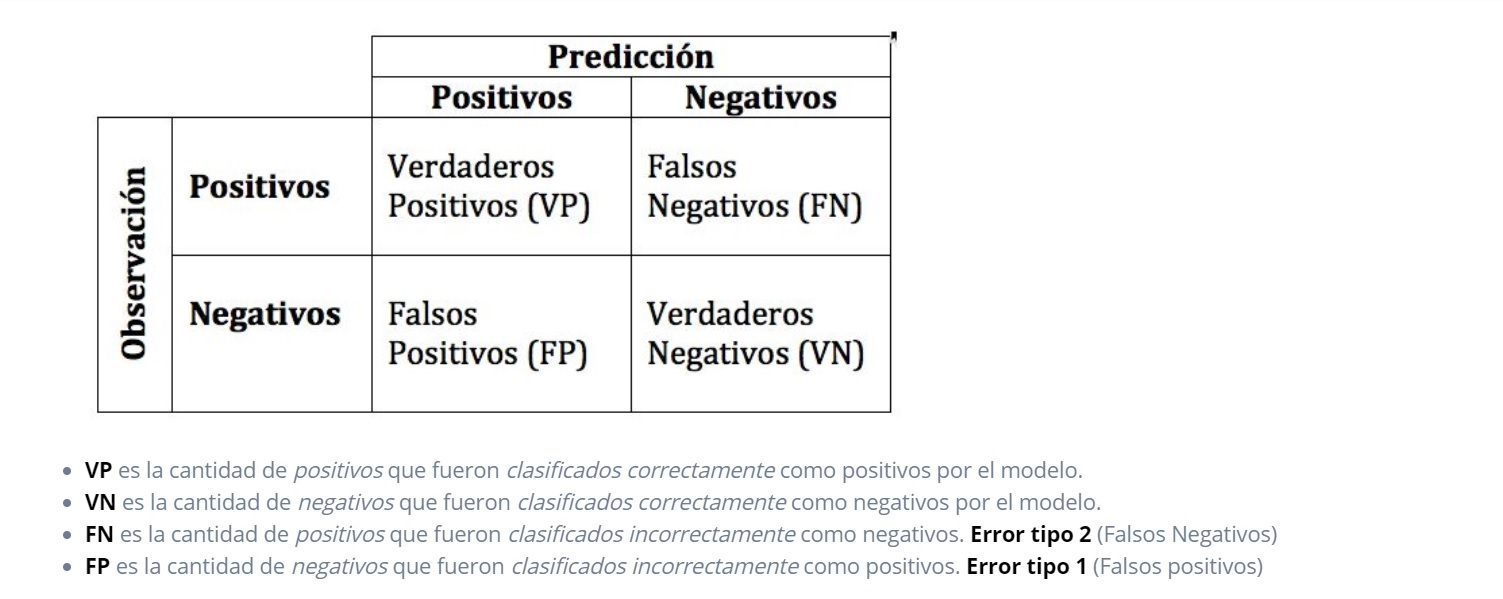

Se puede evaluar el modelo con la matriz de confusión interpretando algunos estadísticos:

Se evalúa el modelo de acuerdo a estas condiciones:


*   Accuracy o exactitud
$$accuracy = \frac{VP + FP}{n}$$
*   Precision o precisión
$$precision = \frac{TP}{VP + FP}$$
*   Recall o recuperación
$$recall = \frac{VP}{VP + FN}$$
*   Especificity o especificidad (tasa de verdaderos negativos)
$$especificity = \frac{VP}{VN + FP}$$





#Construyendo los datos del model de regresión logistíca

In [275]:
print('DATOS DEL MODELO DE REGRESION LOGISTICA')
print()

print('Valor de las pendientes o coeficientes de cada variable PhysicalHealth  , MentalHealth   SleepTime:')
print(modelo.coef_)

print('Valor de la intersección o coeficiente a:')
print(modelo.intercept_)

print('Precisión del modelo:')
print(modelo.score(X_train, y_train))

DATOS DEL MODELO DE REGRESION LOGISTICA

Valor de las pendientes o coeficientes de cada variable PhysicalHealth  , MentalHealth   SleepTime:
[[ 0.05665152 -0.00906907  0.03990527]]
Valor de la intersección o coeficiente a:
[-2.87310598]
Precisión del modelo:
0.914980690755015


#Valor Probabilístico

In [276]:

print(modelo.score(X_test, y_test))

0.9120999390234369


#Interpretación
Como podemos observar pudimos implementar el modelo de regresión logística binaria con datos relacionados a una condición de salud de las personas para predecir anomalías de corazón y evaluar la exactitud del modelo mediante la matriz de confusión.

En este análisis de datos usamos un conjunto de datos que es del conjunto de datos el cual fue anidado de manera local el conjunto de datos “heart_2020_cleaned.csv”.

El proposito de esta analisis fue el poder conocer los valores ajustados toma valores elevados y positivos lo cual implicar el calcular el logaritmo natural de cada valor de para determinar su probabilidad en esta analisis.

Entonces los datos que están relacionados con aspectos médicos y con valores numéricos de varias variables se caracterizan por el estado de salud que es de 319,795 personas. Al cual se le realizo este analisis estadistico.

#Bibliografía
Zang, Jindu. 2020. “Predicción de Las Rentas de Un Censo Mediante Regresión Logística y Regresión Logística Robusta.” http://diposit.ub.edu/dspace/bitstream/2445/172133/1/TFG_ZangJinduo.pdf.

TypeError: predict() got an unexpected keyword argument «callbacks». (2019, 9 mayo). Stack Overflow. https://stackoverflow.com/questions/56054091/typeerror-predict-got-an-unexpected-keyword-argument-callbacks

Regresión logística Python. (s. f.). cienciadedatos. https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html

Regresión logística Python. (s. f.-b). cienciadedatos. https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html#:%7E:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20un,de%20modelos%20de%20clasificaci%C3%B3n%20binaria.